# Andres Graterol - 4031393 - Fall 22
# Homework 3 Question 1

## Basis Functions

In [98]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# Constructing uniformly spaced centers based on:
# input data and the degree of complexity 
def construct_centers(input_data, degree):
    #print(input)
    centers_list = []
    
    # Split the input data into M equal portions
    #equal_splits = np.array_split(input, degree)
    #print("equal splits:", equal_splits)
    
    x_max = input_data[degree-1]
    print("Upper interval", x_max)
    x_min = input_data[0]
    print("Lower interval", x_min)
    spacing = x_max - x_min
    print("spacing", spacing)
    
    # Find the center for each portion and add them to the list
    for i in range(degree):
        #centers_list.append(np.mean(split))
        centers_list.append(spacing * (i+1))
        
    return centers_list

def compute_design_matrix(centers, input_data, degree):
    # Set s, the width parameters of the gaussians
    s = 2*(centers[1] - centers[0])
    #print("Width value: ", s)
    
    # Will hold the final design matrix 
    design_matrix = []
    
    # Each data point will make up a row in the
    # design matrix
    for point in input_data:
        row_array = []
        
        for m in range(degree):
            numerator = (point-centers[m])**2 
            denominator = 2*(s**2)
            
            # calculate phi of j
            phi = np.exp(-(numerator/denominator))
            #print(f"phi of {m} for {point}:", phi)
            
            # add it to the current row array 
            row_array.append(phi)
            
        # add the row to the design matrix
        design_matrix.append(row_array)
        
    return design_matrix

In [100]:
# Testing out our existing functions 
M = 3
x = np.array([0,1,2,3,4,5,6,7,8,9,10,11])

centers = construct_centers(x, M)
print("Centers for our data:", centers)

design_matrix = compute_design_matrix(centers, x, M)
print("Design matrix:", design_matrix)

Upper interval 2
Lower interval 0
spacing 2
Centers for our data: [2, 4, 6]
Design matrix: [[0.8824969025845955, 0.6065306597126334, 0.32465246735834974], [0.9692332344763441, 0.7548396019890073, 0.45783336177161427], [1.0, 0.8824969025845955, 0.6065306597126334], [0.9692332344763441, 0.9692332344763441, 0.7548396019890073], [0.8824969025845955, 1.0, 0.8824969025845955], [0.7548396019890073, 0.9692332344763441, 0.9692332344763441], [0.6065306597126334, 0.8824969025845955, 1.0], [0.45783336177161427, 0.7548396019890073, 0.9692332344763441], [0.32465246735834974, 0.6065306597126334, 0.8824969025845955], [0.2162651668298873, 0.45783336177161427, 0.7548396019890073], [0.1353352832366127, 0.32465246735834974, 0.6065306597126334], [0.07955950871822769, 0.2162651668298873, 0.45783336177161427]]


## Training the model

In [101]:
def compute_optimal_weights(design_matrix, true_values):
    # phi^T phi
    print("Computing optimal weights...")
    print(design_matrix)
    print("Now for the transpose")
    print(np.transpose(design_matrix))
    
    #temp = design_matrix.transpose() @ design_matrix
    temp = np.matmul(np.transpose(design_matrix), design_matrix)
    print("Temp", temp)
    
    # (phi^T phi)^-1 phi^T
    #psuedo_inverse = np.linalg.inv(temp) @ design_matrix.transpose()
    psuedo_inverse = np.matmul(np.linalg.inv(temp), np.transpose(design_matrix))
    
    # TODO: Check the work on this!
    #w_star = psuedo_inverse @ true_values
    w_star = np.matmul(psuedo_inverse, true_values)
    
    return w_star

def learned_model(design_matrix, optimal_weights):
    #learned_model = optimal_weights.transpose() @ design_matrix
    # y(x,w) = phi x w
    #learned_model = design_matrix @ optimal_weights 
    learned_model = np.matmul(design_matrix, optimal_weights)
    return learned_model

In [102]:
N = 25
M = 20
# 25 points between 0 and 1 
input_data = np.linspace(0, 1, N)
print("Shape: ", input_data.shape)
#print("Input Data:", input_data)

# Obtaining true values by applying noise to the sine of the input data
true_values_list = []
sine = []

for x in input_data:
    # model
    #print("input:", x)
    #print("Value:", np.sin(2*np.pi*x))
    sine.append(np.sin(2*np.pi*x))
    gaussian_noise = np.random.normal(loc = 0, scale = 0.2)
    #print("Gaussian Noise: ", gaussian_noise)
    true_values_list.append(np.sin(2*np.pi*x) + gaussian_noise)
     
#print("\n Model: \n ", sine)
#print("\nTarget set: \n", true_values)

true_values = np.array(true_values_list)
print("Shape of true values before", true_values.shape)
true_values = true_values[: , np.newaxis]
print("Shape of true values after", true_values.shape)
print("True Values:", true_values)

# First find the 20 centers to compute the design matrix
centers = construct_centers(input_data, M)
#print("Centers for our data:", centers)

# Find the design matrix at the input_data
design_matrix_list = compute_design_matrix(centers, input_data, M)
print("Design Matrix:", design_matrix)
design_matrix = np.array(design_matrix_list)
print("Shape of Design matrix:", design_matrix.shape)

# Find the optimal weights
optimal_weights = compute_optimal_weights(design_matrix, true_values)
print("optimal weights:", optimal_weights)
print("Shape of optimal weights ", optimal_weights.shape)

Shape:  (25,)
Shape of true values before (25,)
Shape of true values after (25, 1)
True Values: [[-0.20374623]
 [ 0.14372201]
 [ 0.54260855]
 [ 0.64207914]
 [ 0.50027797]
 [ 1.11544304]
 [ 1.03053953]
 [ 0.95359064]
 [ 0.85272332]
 [ 0.89819888]
 [ 0.46927799]
 [ 0.07555262]
 [ 0.31292497]
 [-0.14714082]
 [-0.56511251]
 [-0.88119494]
 [-1.01166327]
 [-1.12561454]
 [-1.06850924]
 [-0.99286071]
 [-0.62520433]
 [-0.86876528]
 [-0.84156139]
 [-0.34884077]
 [-0.10924536]]
Upper interval 0.7916666666666666
Lower interval 0.0
spacing 0.7916666666666666
Design Matrix: [[0.8824969025845955, 0.6065306597126334, 0.32465246735834974], [0.9692332344763441, 0.7548396019890073, 0.45783336177161427], [1.0, 0.8824969025845955, 0.6065306597126334], [0.9692332344763441, 0.9692332344763441, 0.7548396019890073], [0.8824969025845955, 1.0, 0.8824969025845955], [0.7548396019890073, 0.9692332344763441, 0.9692332344763441], [0.6065306597126334, 0.8824969025845955, 1.0], [0.45783336177161427, 0.7548396019890073,

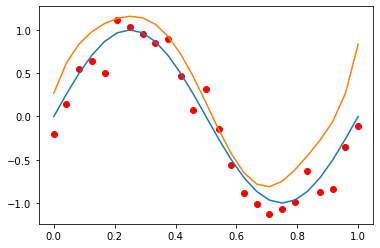

In [103]:
# Model for the training set
# TODO: Check the correctness of this function!
# TODO: Had to modify the formula for the learned model, find out why!!!
learned_model_training = learned_model(design_matrix, optimal_weights)

plt.plot(input_data, sine)
plt.scatter(input_data, true_values, color = 'red')
plt.plot(input_data, learned_model_training)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

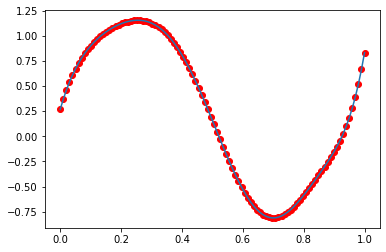

In [110]:
# Model for the testing set 
testing_set = np.linspace(0,1,100)
print(testing_set)

# TODO: Check if we need these testing centers
#test_centers = construct_centers(testing_set, M)
#print(test_centers)

testing_design_matrix_list = compute_design_matrix(centers, testing_set, M)

testing_design_matrix = np.array(testing_design_matrix_list)

learned_model_testing = learned_model(testing_design_matrix, optimal_weights)

#plt.plot(testing_set, sine)
plt.scatter(testing_set, learned_model_testing, color = 'red')
plt.plot(testing_set, learned_model_testing)

As you can see, the model greatly overfits and hits every point in the testing set

### Bias-Variance Tradeoff

In [ ]:
# Generate 10 training sets 
